# Assignment 6: Introduction to Classifiers

### <b>NetID</b>: acv49

### Problems
- Problem 1 (4 points)
- Problem 2 (3 points)
- Problem 3 (2 points)
- Problem 4 (1 point)

Two lectures ago we covered linear regression and predicting the value of a continuous variable. We use __classifiers__ to predict binary or categorical variables. Classifiers can help us answer yes/no questions or categorize an observation into one of several categories.

## kNN Classifier

There are various classification algorithms, each of which is better suited to some situations than others. In this lecture we are learning about __kNN__, which is one of these classifiers

In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

df = pd.read_csv('lecture6data.csv')
df=df.drop('Unnamed: 32',axis=1)
df=df.drop('id',axis=1)
df.head()
# df.columns

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## <span style="color:purple">_Problem 1 (4 points)_</span>

Build a kNN model predicting whether an observation is benign or malignant. You should split the dataset into a training set and a test set as covered previously in the course, fit the model on the observations in the training set, and predict the target variable for the test set.

There are a couple of things to note for this problem. First, you are free to choose whichever features you want to predict the target feature, but you should not use id or the target variable itself. Second, you can optionally choose the k parameter for the kNN model (the default value is 5).

Save your predictions in a variable named "predictions".

**Please do not change the variable names already provided as they are used later in the demo**

In [8]:
# TODO separate your X (features) and your Y (target).
X = df[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]
Y = df['diagnosis']

# TODO train test split your data with 20% being used for testing
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

# This is the function we use to create the kNN model (default k=5)
model = KNeighborsClassifier()

model.fit(x_train, y_train)

# TODO store the predictions for the test sets
predictions = model.predict(x_test)

print(predictions)


['M' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'B' 'B'
 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'B' 'B' 'B' 'M' 'B' 'M' 'B' 'M'
 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'M'
 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'M' 'B' 'B' 'M' 'B' 'M'
 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'M'
 'M' 'B' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'M' 'M' 'M'
 'B' 'M' 'M' 'M' 'B' 'B']


In [9]:
# TODO find the accuracy score of your predictions
from sklearn.metrics import accuracy_score
print("sklearn's accuracy score for diagnosis:", accuracy_score(y_test, predictions))


sklearn's accuracy score for diagnosis: 0.8947368421052632


### <span style="color:purple"> _end of Problem 1_</span>

## Measuring Accuracy

Measuring the accuracy of classifiers is more intuitive than calculating the accuracy of a linear regression model. When we predict categorical values, our accuracy score is simply the proportion of values that we computed correctly. For example, if we have a test set of size 100 and we predict 93 of the observations correctly, we have an accuracy score of 93 percent.

In [10]:
# Compute the accuracy score of the model created above
accuracy = accuracy_score(y_test, predictions)
print('accuracy:',accuracy)

# Compute the accuracy of predicting all diagnoses are benign
y_train.describe()
y_test.describe()
base_array = np.full(114, 'B')

baseline = accuracy_score(y_test, base_array)
print('baseline:',baseline)

# Compute the percent improvement from the baseline
improvement = (accuracy - baseline) / baseline
print('improvment',improvement)

accuracy: 0.8947368421052632
baseline: 0.5614035087719298
improvment 0.5937500000000001


The above improvement shows just how beneficial the kNN model can be. It also shows us that we have chosen an appropriate value for k because there is an improvement over the baseline assumption (average category of values).

## Fit/Overfitting

Below are accuracy scores of the same kNN model, but with the value of k changing. Note how the accuracy changes as k increases. As mentioned during the lecture, a high value of k can improve the accuracy of the model, but too high a value of k will essentially be the average of all of the data.

In [12]:
# Model when k=1
model1 = KNeighborsClassifier(1)
model1.fit(x_train, y_train)
predictions1 = model1.predict(x_test)

# Model when k=10
model10 = KNeighborsClassifier(10)
model10.fit(x_train, y_train)
predictions10 = model10.predict(x_test)

# Model when k=100
model100 = KNeighborsClassifier(100)
model100.fit(x_train, y_train)
predictions100 = model100.predict(x_test)

print("accuracy score when k=1:", accuracy_score(y_test, predictions1))
print("accuracy score when k=10:", accuracy_score(y_test, predictions10))
print("accuracy score when k=100:", accuracy_score(y_test, predictions100))


accuracy score when k=1: 0.9035087719298246
accuracy score when k=10: 0.868421052631579
accuracy score when k=100: 0.868421052631579


## <span style="color:purple">_Problem 2 (3 points)_</span>

Now we are going to plot the relationship between the value of k and the accuracy score of the model for this data set.

Using a loop, create models with neighbors ranging from 1-30. Find the accuracy for each of these models and graph them with number of neighbors on the x-axis and accuracy on the y-axis. Please label your axes, and add a title to your plot.

**You do not need to redo the train test split.**

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score

In [19]:
# TODO find the accuracy of the model with each value of k from 1-30 inclusive
for k in range(1, 31):
    model = KNeighborsClassifier(k)
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    accuracy = accuracy_score(y_test, predictions)
    print('accuracy when k =', k, ':', accuracy)

accuracy for k = 1 : 0.9035087719298246
accuracy for k = 2 : 0.8859649122807017
accuracy for k = 3 : 0.9035087719298246
accuracy for k = 4 : 0.8859649122807017
accuracy for k = 5 : 0.8947368421052632
accuracy for k = 6 : 0.8771929824561403
accuracy for k = 7 : 0.8859649122807017
accuracy for k = 8 : 0.8859649122807017
accuracy for k = 9 : 0.8771929824561403
accuracy for k = 10 : 0.868421052631579
accuracy for k = 11 : 0.868421052631579
accuracy for k = 12 : 0.868421052631579
accuracy for k = 13 : 0.868421052631579
accuracy for k = 14 : 0.868421052631579
accuracy for k = 15 : 0.868421052631579
accuracy for k = 16 : 0.868421052631579
accuracy for k = 17 : 0.868421052631579
accuracy for k = 18 : 0.868421052631579
accuracy for k = 19 : 0.868421052631579
accuracy for k = 20 : 0.868421052631579
accuracy for k = 21 : 0.868421052631579
accuracy for k = 22 : 0.868421052631579
accuracy for k = 23 : 0.868421052631579
accuracy for k = 24 : 0.868421052631579
accuracy for k = 25 : 0.868421052631579


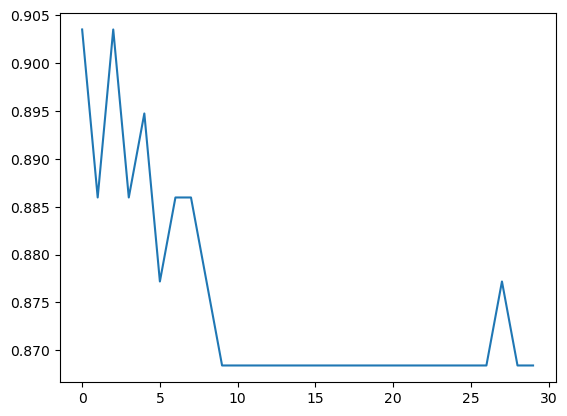

In [20]:
# TODO create the plot of the accuracy array determined in the previous cell
plt.plot(accuracy_scores)

### <span style="color:purple">_end of Problem 2_</span>

## Confusion Matrix

**Reminder**: The confusion matrix is depicted below

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg .tg-ik58{background-color:#ffcb2f;border-color:inherit;text-align:left;vertical-align:top}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
</style>
<table class="tg">
  <tr>
    <td class="tg-ik58"></td>
    <td class="tg-ik58">Positive'<br>(Predicted)</td>
    <td class="tg-ik58">Negative'<br>(Predicted)</td>
  </tr>
  <tr>
    <td class="tg-0pky">Positive<br>(Actual)</td>
    <td class="tg-0pky">True Positive</td>
    <td class="tg-0pky">False Negative</td>
  </tr>
  <tr>
    <td class="tg-0pky">Negative<br>(Actual)</td>
    <td class="tg-0pky">False Positive</td>
    <td class="tg-0pky">True Negative</td>
  </tr>
</table>

Here are the equations specified in the lecture for your convenience with the next problem.

**Sensitivity** = True Positive /(True Positive + False Negative)

**Specificity** = True Negative /(True Negative + False Positive)

**Accuracy** = (True Positive + True Negative) / Total

**Error** = (False Positive + False Negative) / Total

**Precision** = True Positive / (True Positive + False Positive)

## <span style="color:purple">_Problem 3 (2 points)_</span>

Given the Table Below, Calculate the **Specificity**, **Sensitivity**, **Overall Error Rate**, **Overall Accuracy**, **Precision** of the data. (show us the calculations, don't just hard code the answers!)
<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg .tg-ik58{background-color:#ffcb2f;border-color:inherit;text-align:left;vertical-align:top}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
</style>
<table class="tg">
  <tr>
    <td class="tg-ik58"></td>
    <td class="tg-ik58">Positive'<br>(Predicted)</td>
    <td class="tg-ik58">Negative'<br>(Predicted)</td>
  </tr>
  <tr>
    <td class="tg-0pky">Positive<br>(Actual)</td>
    <td class="tg-0pky">146</td>
    <td class="tg-0pky">32</td>
  </tr>
  <tr>
    <td class="tg-0pky">Negative<br>(Actual)</td>
    <td class="tg-0pky">21</td>
    <td class="tg-0pky">590</td>
  </tr>
</table>

In [21]:
true_pos = 146
false_pos = 21
true_neg = 590
false_neg = 32

print("sensitivity:", (true_pos) / (true_pos + false_neg))
print("specificity:", (true_neg) / (true_neg + false_pos))
print("accuracy:", (true_pos + true_neg) / (true_pos + true_neg + false_pos + false_neg))
print("error:", (false_pos + false_neg) / (true_pos + true_neg + false_pos + false_neg))
print("precision:", (true_pos) / (true_pos + false_pos))

sensitivity: 0.8202247191011236
specificity: 0.9656301145662848
accuracy: 0.9328263624841572
error: 0.06717363751584284
precision: 0.874251497005988


### <span style="color:purple">_end of Problem 3_</span>

## <span style="color:purple">_Problem 4_ (1 point)</span>

Let's say you want to run kNN on a dataset with both continuous features and binary features. Can you think of any potential issues that might arise from mixing these data types? Also, how might you preprocess categorical data to use in a kNN? Ordinal data?



One potential issue that may arise from mixing the data types is that for large continuous variables, the values of the binary features may be skewed. To solve this problem, you could try normalizing the data so that you don't run into this issue.

#### Just a reminder about the mid semester feedback form posted on ED. We'd really appreciate it if you could fill it out!!

## <span style="color:purple">_Problem 5_ (extra credit)</span>


Before running kNN, which of the following kinds of preprocessing should we do? Choose all that apply.

1) Scale

2) Center

3) Remove correlated features

4) Remove outliers


1. Yes 
2. optional
3. No
4. Optional

### <span style="color:purple">_end of Problem 5_</span>

## <span style="color:purple">_Problem 6_ (extra credit)</span>

We've talked about sensitivity and specificity. Recall these high level intuitions:
- high sensitivity -> able to correctly identify positives
- high specificty -> able to correctly identify negatives

### <span style="color:purple">Part a</span>
Identify a model that has have 100% sensitivity, no matter what dataset it is run on. Similarly, identify a model with 100% specificity.

**Hint**: Recall that a "model" is just a function, meaning that it takes in an input and *spits out an output*. Your job is to figure out, if you get an input x, should the output for that x be 0 or should it be 1?


### <span style="color:purple">Part b</span>
In Problem 2, you plotted kNN accuracy vs `k`. Now, make a plot kNN sensitivity vs. `k` and another plot for kNN specificity. Use the same dataset as in Problem 2, and go from k=1 to k=30.

### <span style="color:purple">Part c</span>
Now, plot the average of specificity and sensitivity against the number of neighbors.

### <span style="color:purple">Part d (just for fun)</span>
Prove the following statement:

*If the testing set has the same number of positive and negative examples, then the accuracy is equal to the average of the specificity and sensitivity.*

### <span style="color:purple">Part f (even more fun???)</span>
In part D, we saw a special case where accuracy is the average between specificity and sensitivity. Let's look at the general case -- how different is accuracy from the average between specificity and sensitivity? Investigate this question by proving the following statement:

Let `p` = # of false positives, and `N` = # of true negatives. Suppose that in the training set, there are `x` times as many positive examples as their are negative examples. Also suppose that the number of true positives is equal to the number of false positives. Then, `acc` = `R` * `avg`, where `acc` = accuracy, `avg` = the average of specificy and sensitivity, and `R` = $\frac{(p+N)x}{Nx^2+\left(p+N\right)x+p}$.

### <span style="color:purple">_end of Problem 6_</span>